# **Sentiment Analysis for Stock Prices**

This notebook demonstrates how to fetch sentiment data from financial news using OpenBB and correlate it with stock price movements. The analysis will use sentiment scores to understand the impact of news on stock prices.

Author:<br>
[Anuj Kumar Pandey](https://github.com/codermal7)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1BXyVZEYZfrVdvaM7vDRoVn0cKSG_BT7Q?usp=sharing)


If you are running this notebook in Colab, you can run the following command to install the OpenBB Platform:

`!pip install openbb -q`

In [55]:
!pip install openbb -q

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from openbb import obb
from textblob import TextBlob

In [57]:
symbols = ['AAPL', 'GOOG', 'MSFT', 'NVDA']
dataframes = []

for symbol in symbols:
    try:
        data = obb.equity.price.historical(
            symbol=symbol,
            start_date='2010-01-01',
            provider="yfinance"
        ).to_df()
        data['Symbol'] = symbol
        dataframes.append(data)
    except Exception as e:
        print(f"Failed to fetch data for {symbol}: {str(e)}")

combined_data = pd.concat(dataframes)
combined_data = combined_data.reset_index()

combined_data.head()

,date,open,high,low,close,volume,split_ratio,dividend,Symbol
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600,0.0,0.0,AAPL
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800,0.0,0.0,AAPL
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000,0.0,0.0,AAPL
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200,0.0,0.0,AAPL
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800,0.0,0.0,AAPL


In [58]:
news_data = {
    "AAPL": ["Apple releases new iPhone, stocks rise", "Apple faces new challenges in production"],
    "GOOG": ["Google announces AI breakthroughs", "Google facing lawsuit over privacy issues"],
    "MSFT": ["Microsoft's cloud service revenue surges", "Microsoft layoffs hit global offices"],
    "NVDA": ["NVIDIA dominates the GPU market", "NVIDIA shares drop amidst market concerns"]
} # I have taken this dummy data sentiment analysis

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

sentiment_scores = {}
for symbol in news_data:
    headlines = news_data[symbol]
    scores = [get_sentiment(headline) for headline in headlines]
    avg_sentiment = sum(scores) / len(scores)
    sentiment_scores[symbol] = avg_sentiment
    print(f"{symbol} Average Sentiment Score: {avg_sentiment}")

AAPL Average Sentiment Score: 0.13636363636363635
GOOG Average Sentiment Score: 0.0
MSFT Average Sentiment Score: 0.0
NVDA Average Sentiment Score: 0.0


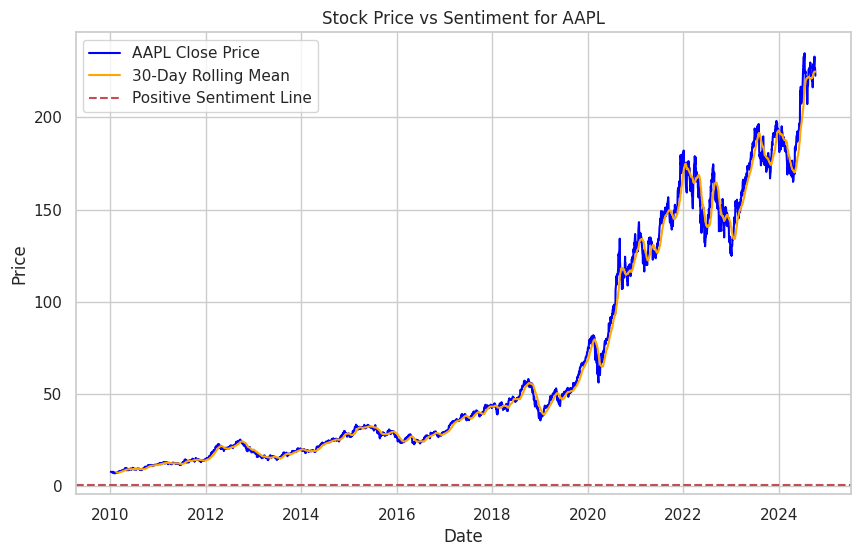

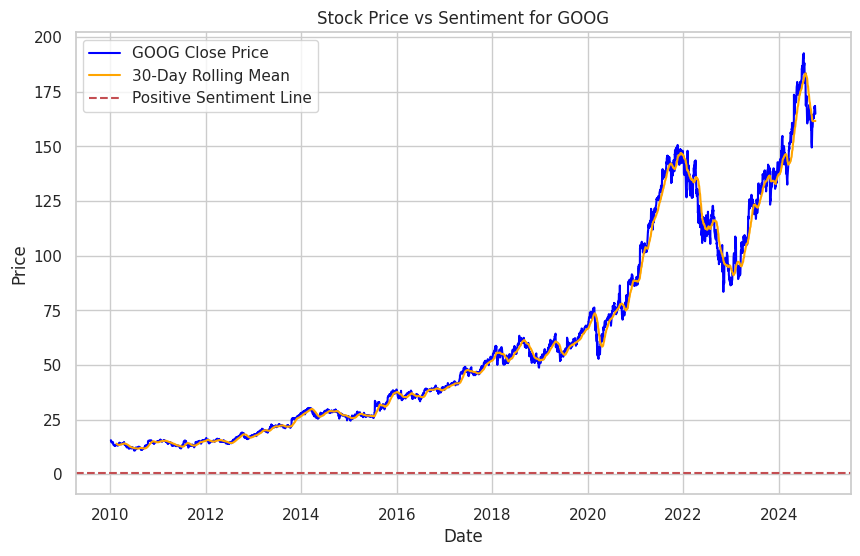

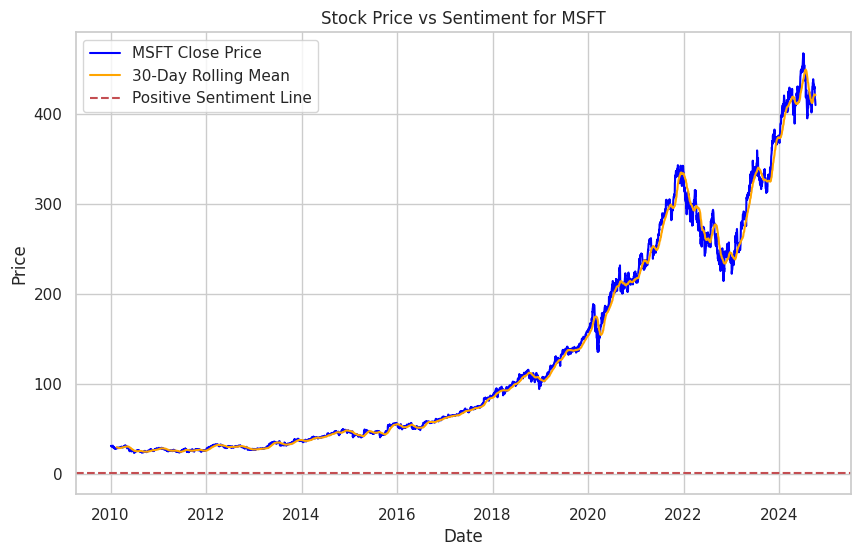

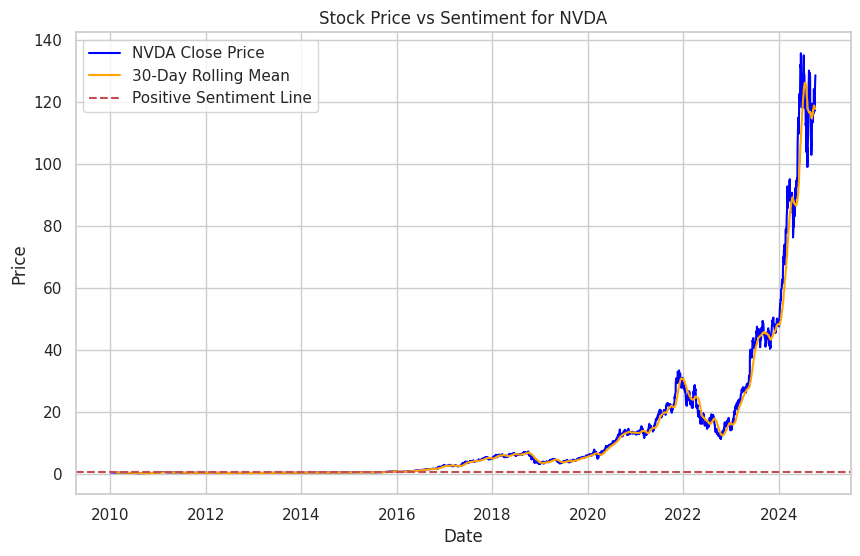

In [59]:
def visualize_stock_prices_with_sentiment(data, symbol, avg_sentiment):
    stock_data = data[data['Symbol'] == symbol]

    stock_data['Rolling Mean'] = stock_data['close'].rolling(window=30).mean()

    plt.figure(figsize=(12, 7))
    sns.set(style="whitegrid")

    plt.plot(stock_data['date'], stock_data['close'], label=f'{symbol} Close Price', color='blue', alpha=0.6)

    plt.plot(stock_data['date'], stock_data['Rolling Mean'], label=f'{symbol} 30-day Rolling Mean', color='orange', linestyle='--')

    plt.axhline(y=avg_sentiment, color='green' if avg_sentiment > 0 else 'red', linestyle='--', label=f'Sentiment Score ({avg_sentiment:.2f})')

    plt.title(f'{symbol} Stock Price vs Sentiment', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price (USD)', fontsize=12)

    plt.annotate('Sentiment Impact', xy=(stock_data['date'].iloc[-200], stock_data['Rolling Mean'].iloc[-200]),
                 xytext=(stock_data['date'].iloc[-300], stock_data['Rolling Mean'].iloc[-300]+50),
                 arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)

    plt.legend(loc='best', fontsize=10)
    plt.xticks(rotation=45)
    plt.show()


for symbol in symbols:
    stock_data = combined_data[combined_data['Symbol'] == symbol].copy()

    stock_data.loc[:, 'Rolling Mean'] = stock_data['close'].rolling(window=30).mean()

    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['date'], stock_data['close'], label=f'{symbol} Close Price', color='blue')
    plt.plot(stock_data['date'], stock_data['Rolling Mean'], label='30-Day Rolling Mean', color='orange')

    plt.axhline(y=0.5, color='r', linestyle='--', label='Positive Sentiment Line')

    plt.title(f'Stock Price vs Sentiment for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()